<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DeepLearning/blob/main/WaveNet/ch04_05_WaveNet_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ch04.05 Wave Net

* 날짜: 2022-08-23
* 이름: 김민규

## 학습내용
    - Audio data에 대해 이해한다.
    - 머신러닝 방법으로 접근하여 문제를 해결해 본다.
    - 딥러닝 네트워크를 이용해 문제를 해결한다.
    - waveNet, yamNet 등 딥러닝 알고리즘을 적용한다.



In [2]:
import sys, os
sys.path.append('/content/drive/MyDrive/deep_learning_frame_work/06. deep_learning/scripts_Packages')
from import_lib import *

## 데이터셋 - Kaggle GTZAN Dataset 
---

https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification



### **| kaggle 데이터 연동**


1. kaggle 로그인 - my account - API Create New Api Token - `kaggle.json` 파일 다운로드
2. Drive에 저장해 놓는것을 권장
3. kaggle 패키지 다운로드
```
! pip install kaggle
```
4. 권한 변경
```
! chmod 600 `드라이브 파일 경로`
```
5. `~/` 위치에 복사
```
! cp `드라이브 파일 경로` ~/.kaggle/
```

6. 데이터셋 다운로드
```
! kaggle datasets download 데이터주소
```

In [3]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
! mkdir ~/.kaggle

In [8]:
! ls -a /root

.   .bashrc  .config   .jupyter  .keras  .npm	   .tmux.conf
..  .cache   .ipython  .kaggle	 .local  .profile  .wget-hsts


In [11]:
! chmod 600 '/content/drive/MyDrive/deep_learning_frame_work/06. deep_learning/scripts_Packages/kaggle.json'

In [12]:
! cp '/content/drive/MyDrive/deep_learning_frame_work/06. deep_learning/scripts_Packages/kaggle.json' ~/.kaggle/

In [13]:
! kaggle datasets download andradaolteanu/gtzan-dataset-music-genre-classification

 98% 1.19G/1.21G [00:08<00:00, 174MB/s]
100% 1.21G/1.21G [00:08<00:00, 154MB/s]


In [14]:
!unzip /content/gtzan-dataset-music-genre-classification.zip

Archive:  /content/gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues

### **| EDA**

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('/content/Data/features_30_sec.csv')
print(df.shape)
df.head()

(1000, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

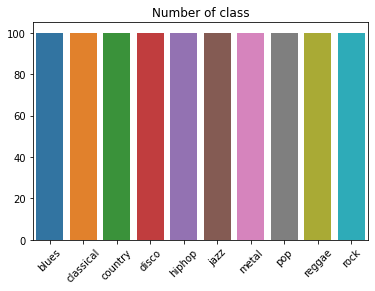

In [21]:
# 예측해야할 클래스

class_count = df['label'].value_counts()
plt.title('Number of class')
_=sns.barplot(x=class_count.index ,y=class_count.values)
plt.xticks(rotation=45)
class_count


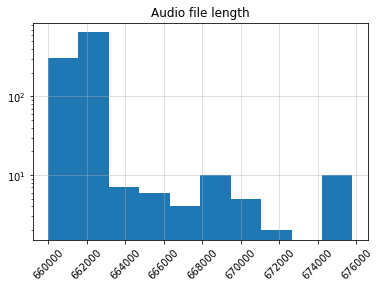

In [25]:
# 음성 파일의 길이
plt.title('Audio file length')
_ = plt.hist(df['length'], log=True)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)

특성 개수 57


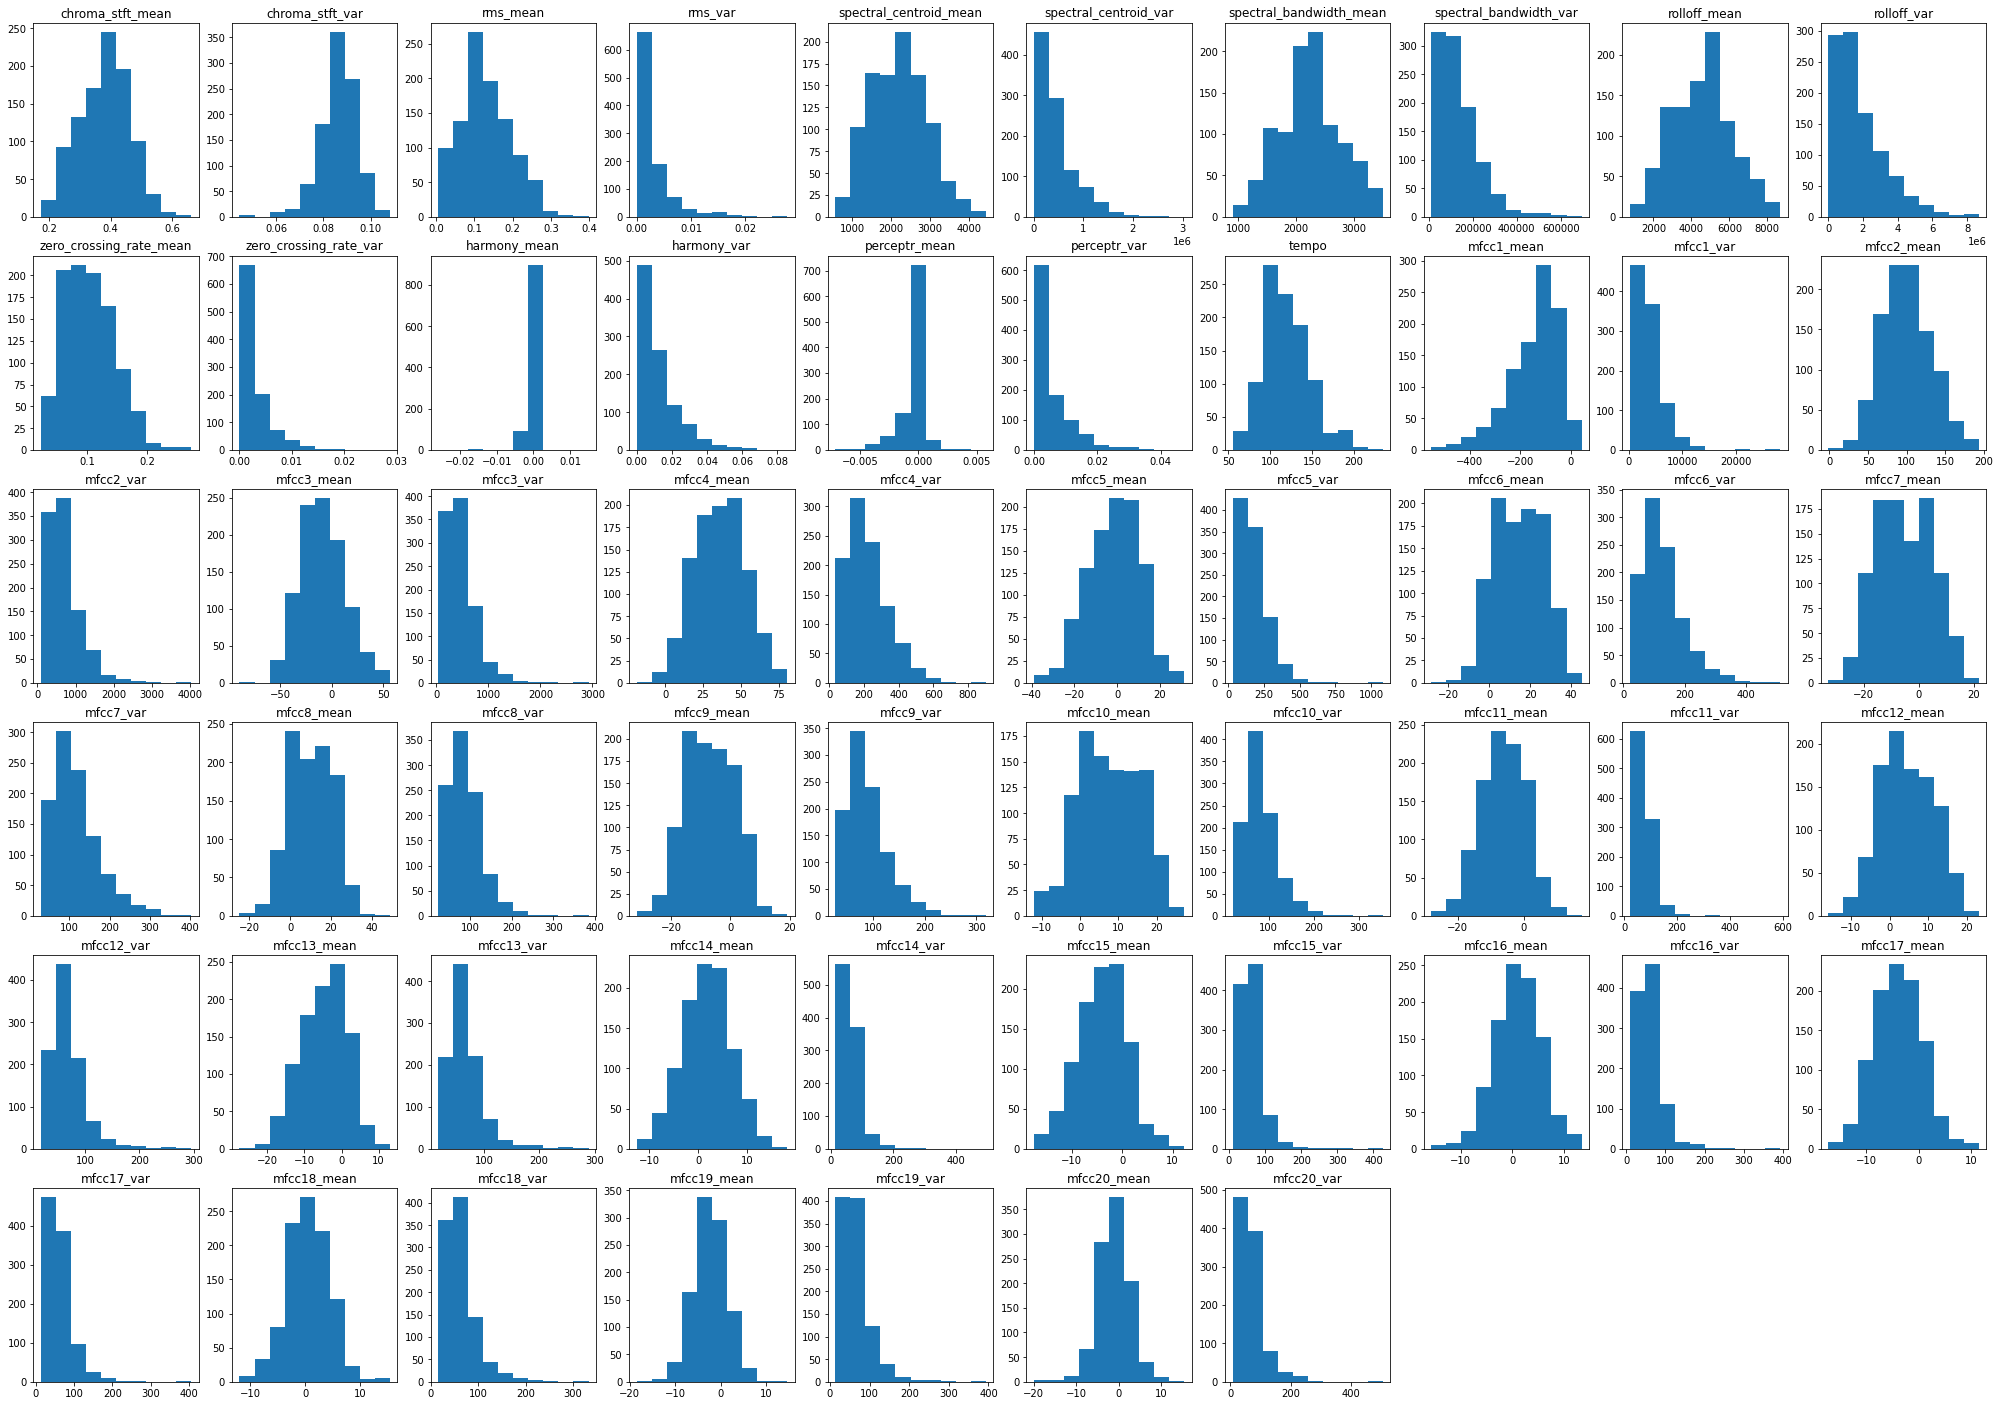

In [32]:
# 특성 분포
print('특성 개수', len(df.columns[2:-1]))
plt.figure(figsize=(35,25))
for i,col in enumerate(df.columns[2:-1]):
    plt.subplot(6,10, i+1)
    plt.title(col)
    plt.hist(df[col])

## 머신러닝 접근 방법 (features)
---

### **| 파라미터 추가**


### **| 전처리**


In [34]:
# label encoding ( blues, disco, ...) -> (0, 1, ...)
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['le_label'] = le.fit_transform(df['label'])
print(le.classes_)
df.head()

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,le_label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues,0
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues,0
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues,0
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues,0
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues,0


In [35]:
x = df.drop(columns=['filename','length','label','le_label'])
y = df['le_label']
x.shape, y.shape

((1000, 57), (1000,))

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y,
                                                    random_state=0)
print('train', x_train.shape, y_train.shape)
print('test', x_test.shape, y_test.shape)

train (900, 57) (900,)
test (100, 57) (100,)


In [38]:
# x 정규화
sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train.shape, x_test.shape

((900, 57), (100, 57))

### **| 학습 - XGBoost**

In [39]:
! pip install xgboost -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 31 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=1000)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

Test Acc: 0.79


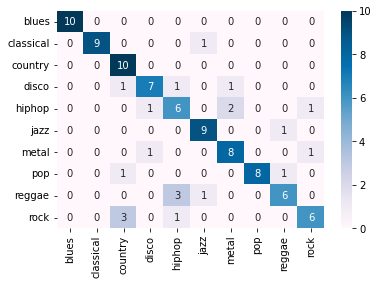

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
def show_result(model, x_test, y_test):
    y_pred = xgb.predict(x_test)
    print('Test Acc:',accuracy_score(y_test, y_pred))
    #print(classification_report(y_test, y_pred))
    confusion_matrix(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='PuBu', xticklabels=le.classes_, yticklabels=le.classes_)
show_result(xgb, x_test, y_test)

In [80]:
from tensorflow.keras import models, layers, utils

def build_model(xgb, x_test, y_test):
    x = layers.Input(shape=(57,)) # 데이터가 주어지면 인풋의 shape는 고정
    z = layers.Dense(15,activation='relu')(x)
    z = layers.Dense(6,activation='relu')(z)
    y = layers.Dense(1)(z) # 데이터가 주어지면 아웃풋의 shape는 고정 
    # (회귀문제는 마지막 아웃풋 shape가 1, 마지막 활성함수는 사용하지 않음)
    model = models.Model(x,y, name='house_regressor')
    return model

### **| 학습 - DNN**

In [95]:
from tensorflow.keras import models, layers, utils

def build_model(xgb, x_test, y_test):
    x = layers.Input(shape=(57))
    z = layers.Flatten()(x)
    z = layers.Dense(256, activation='relu')(z)
    z = layers.Dense(256, activation='relu')(z)
    y = layers.Dense(10, activation='softmax')(z)
    model = models.Model(x,y)
    return model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 57)]              0         
                                                                 
 flatten (Flatten)           (None, 57)                0         
                                                                 
 dense_32 (Dense)            (None, 256)               14848     
                                                                 
 dense_33 (Dense)            (None, 256)               65792     
                                                                 
 dense_34 (Dense)            (None, 10)                2570      
                                                                 
Total params: 83,210
Trainable params: 83,210
Non-trainable params: 0
_________________________________________________________________


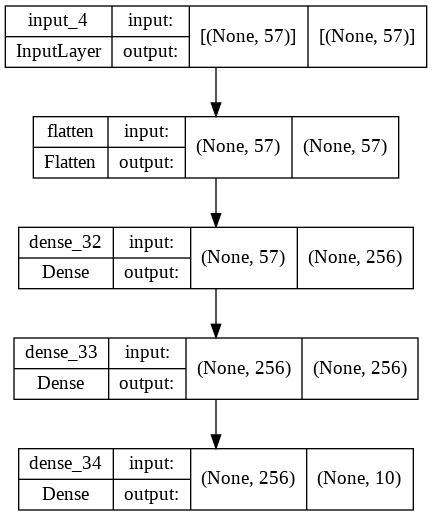

In [96]:
model = build_model(xgb, x_test, y_test)
model.summary()

# 시각화
utils.plot_model(model, show_shapes=True)

In [102]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam')

In [115]:
model.fit(x_train, y_train,
          epochs = 500,
          batch_size = 3)

Epoch 1/500
300/300 [==============================] - 1s 3ms/step - loss: 0.8732
Epoch 2/500
300/300 [==============================] - 1s 3ms/step - loss: 0.2276
Epoch 3/500
300/300 [==============================] - 1s 4ms/step - loss: 0.0645
Epoch 4/500
300/300 [==============================] - 1s 4ms/step - loss: 0.0125
Epoch 5/500
300/300 [==============================] - 1s 4ms/step - loss: 0.0070
Epoch 6/500
300/300 [==============================] - 1s 3ms/step - loss: 0.0051
Epoch 7/500
300/300 [==============================] - 1s 3ms/step - loss: 0.0040
Epoch 8/500
300/300 [==============================] - 1s 3ms/step - loss: 0.0037
Epoch 9/500
300/300 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 10/500
300/300 [==============================] - 1s 2ms/step - loss: 0.0033
Epoch 11/500
300/300 [==============================] - 1s 4ms/step - loss: 0.0031
Epoch 12/500
300/300 [==============================] - 1s 2ms/step - loss: 0.0029
Epoch 13/500


In [116]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 5.8253


5.825260162353516

In [117]:
y_pred = np.argmax(model.predict(x_test), axis=1)

Test Acc: 0.72


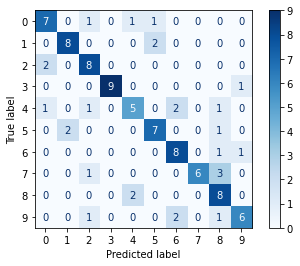

In [118]:
# 혼돈행렬 만들기
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion_matrix는 정수값이 들어가야함
cm = confusion_matrix(y_test,y_pred)
print('Test Acc:',accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(cm).plot(cmap="Blues");

## 딥러닝 접근 방법(Audio 원 데이터)
---